'mesh' Datasets and Options
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe

logger = phoebe.logger()

b = phoebe.default_binary()

Dataset Parameters
--------------------------

Let's add a mesh dataset to the Bundle (see also the [mesh API docs](../api/phoebe.parameters.dataset.mesh.md)).

In [3]:
b.add_dataset('mesh')
print(b.get_dataset(kind='mesh'))

ParameterSet: 6 parameters
    compute_times@mesh01@dataset: [] d
*  compute_phases@mesh01@dataset: []
  compute_phases_t0@mesh01@da...: t0_supconj
    include_times@mesh01@dataset: []
      coordinates@mesh01@dataset: ['xyz', 'uvw']
          columns@mesh01@dataset: []


### compute_times / compute_phases

Note that as of PHOEBE 2.2, the mesh dataset no longer has a `times` parameter, as observations cannot be attached to the mesh dataset.

See the [Compute Times & Phases tutorial](compute_times_phases.ipynb).

In [4]:
print(b.get_parameter(qualifier='compute_times'))

Parameter: compute_times@mesh01@dataset
                       Qualifier: compute_times
                     Description: Times to use during run_compute.
                           Value: [] d
                  Constrained by: 
                      Constrains: compute_phases@mesh01@dataset
                      Related to: period@binary@component, dpdt@binary@component, compute_phases_t0@mesh01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component, compute_phases@mesh01@dataset



In [5]:
print(b.get_parameter(qualifier='compute_phases', context='dataset'))

Parameter: compute_phases@mesh01@dataset
                       Qualifier: compute_phases
                     Description: Phases associated with compute_times.
                           Value: []
                  Constrained by: compute_times@mesh01@dataset, period@binary@component, dpdt@binary@component, compute_phases_t0@mesh01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component
                      Constrains: None
                      Related to: compute_times@mesh01@dataset, period@binary@component, dpdt@binary@component, compute_phases_t0@mesh01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component



In [6]:
print(b.get_parameter(qualifier='compute_phases_t0'))

Parameter: compute_phases_t0@mesh01@dataset
                       Qualifier: compute_phases_t0
                     Description: t0 to use when converting between compute_times and compute_phases.
                           Value: t0_supconj
                         Choices: t0_supconj, t0_perpass, t0_ref
                  Constrained by: 
                      Constrains: compute_phases@mesh01@dataset
                      Related to: compute_times@mesh01@dataset, period@binary@component, dpdt@binary@component, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component, compute_phases@mesh01@dataset
                 Only visible if: hierarchy.is_meshable:False



### include_times

In [7]:
print(b.get_parameter(qualifier='include_times'))

Parameter: include_times@mesh01@dataset
                       Qualifier: include_times
                     Description: append to compute_times from the following datasets/time standards
                           Value: []
                         Choices: t0_perpass@binary, t0_supconj@binary, t0_ref@binary, t0@system
                  Constrained by: 
                      Constrains: None
                      Related to: None



### coordinates

In [8]:
print(b.get_parameter(qualifier='coordinates'))

Parameter: coordinates@mesh01@dataset
                       Qualifier: coordinates
                     Description: coordinates to expose the mesh.  uvw (plane of sky) and/or xyz (roche)
                           Value: ['xyz', 'uvw']
                         Choices: xyz, uvw
                  Constrained by: 
                      Constrains: None
                      Related to: None



### columns

In [9]:
print(b.get_parameter(qualifier='columns'))

Parameter: columns@mesh01@dataset
                       Qualifier: columns
                     Description: columns to expose within the mesh
                           Value: []
                         Choices: volume, xs, ys, zs, vxs, vys, vzs, nxs, nys, nzs, us, vs, ws, vus, vvs, vws, nus, nvs, nws, areas, loggs, teffs, rprojs, mus, visibilities, visible_centroids, rs
                  Constrained by: 
                      Constrains: None
                      Related to: None



Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to meshes

In [10]:
print(b.get_compute())

ParameterSet: 15 parameters
  dynamics_method@phoebe01@co...: keplerian
           ltte@phoebe01@compute: False
   irrad_method@phoebe01@compute: horvat
  boosting_method@phoebe01@co...: none
  eclipse_method@phoebe01@com...: native
  horizon_method@phoebe01@com...: boolean
  mesh_method@primary@phoebe0...: marching
  mesh_method@secondary@phoeb...: marching
  ntriangles@primary@phoebe01...: 1500
  ntriangles@secondary@phoebe...: 1500
  distortion_method@primary@p...: roche
  distortion_method@secondary...: roche
    atm@primary@phoebe01@compute: ck2004
  atm@secondary@phoebe01@compute: ck2004
        enabled@phoebe01@compute: True


### mesh_method

In [11]:
print(b.get_parameter(qualifier='mesh_method', component='primary'))

Parameter: mesh_method@primary@phoebe01@compute
                       Qualifier: mesh_method
                     Description: Which method to use for discretizing the surface
                           Value: marching
                         Choices: marching
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: hierarchy.is_meshable:true



The `mesh_method` parameter determines how each component in the system is discretized into its mesh, and has several options:
 * marching (default): this is the new method introduced in PHOEBE 2.  The star is discretized into triangles, with the attempt to make them each of equal-area and nearly equilateral.  Although not as fast as 'wd', this method is more robust and will always form a closed surface (when possible).
 * wd: this is a re-implementation of the Wilson-Devinney style meshing used in PHOEBE 1.0 (legacy), with the stars discretized into trapezoids in strips of latitude (we then split each trapezoid into two triangles).  This is faster, but suffers from gaps between the surface elements, and is mainly meant for testing and comparison with legacy.  See the [WD-Style Meshing Example Script](../examples/wd_mesh.ipynb) for more details.

### ntriangles

The `ntriangles` parameter is only relevenat if `mesh_method` is 'marching' (so will not be available unless that is the case).

In [12]:
print(b.get_parameter(qualifier='ntriangles', component='primary'))

Parameter: ntriangles@primary@phoebe01@compute
                       Qualifier: ntriangles
                     Description: Requested number of triangles (won't be exact).
                           Value: 1500
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: mesh_method:marching,hierarchy.is_meshable:true



Synthetics
------------------

In [13]:
b.set_value('compute_times', [0])

In [14]:
b.set_value('columns', value='*')

In [15]:
print(b.get_value('columns'))

['*']


In [16]:
print(b.get_value('columns', expand=True))

['volume', 'xs', 'ys', 'zs', 'vxs', 'vys', 'vzs', 'nxs', 'nys', 'nzs', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws', 'nus', 'nvs', 'nws', 'areas', 'loggs', 'teffs', 'rprojs', 'mus', 'visibilities', 'visible_centroids', 'rs']


In [17]:
b.run_compute()

<ParameterSet: 66 parameters | contexts: figure, model>

In [18]:
print(b.filter(context='model').twigs)

['times@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@uvw_elements@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@uvw_normals@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@xyz_elements@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@xyz_normals@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@volume@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@xs@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@ys@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@zs@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@vxs@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@vys@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@vzs@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@nxs@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@nys@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@nzs@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@us@primary@mesh01@phoebe01@latest@mesh@model', '00.000000@vs@primary@mesh01@p

### Per-Mesh Parameters

In [19]:
print(b.get_parameter(qualifier='times', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: times@primary@latest@model
                       Qualifier: times
                     Description: Model (synthetic) times
                           Value: [0.] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### Per-Time Parameters

In [20]:
print(b.get_parameter(qualifier='volume', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: volume@primary@latest@model
                       Qualifier: volume
                     Description: Volume of the stellar surface
                           Value: 4.188790204786394 solRad3
                  Constrained by: 
                      Constrains: None
                      Related to: None



### Per-Element Parameters

`uvw_elements` and `uvw_normals` (plane-of-sky vertices positions and triangle normals) are used internally when plotting meshes and are only exposed if 'uvw' is in the `coordinates` parameter defined in the dataset (before calling [run_compute](../api/phoebe.frontend.bundle.Bundle.run_compute.md)).

In [21]:
print(b.get_parameter(qualifier='uvw_elements', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: uvw_elements@primary@latest@model
                       Qualifier: uvw_elements
                     Description: Vertices of triangles in the plane-of-sky
                           Value: [[[ 1.00235109e-16  1.00235109e-16 -1.63696356e+00]
  [-1.38927560e-01  1.00842067e-16 -1.64687593e+00]
  [-6.94589659e-02 -1.20310044e-01 -1.64697718e+00]]

 [[ 1.00235109e-16  1.00235109e-16 -1.63696356e+00]
  [-6.94589659e-02 -1.20310044e-01 -1.64697718e+00]
  [ 6.94578498e-02 -1.20308085e-01 -1.64699279e+00]]

 [[ 1.00235109e-16  1.00235109e-16 -1.63696356e+00]
  [ 6.94578498e-02 -1.20308085e-01 -1.64699279e+00]
  [ 1.38923748e-01  1.55940817e-16 -1.64690258e+00]]

 ...

 [[ 8.02647345e-01 -1.34867788e-01 -3.23812373e+00]
  [ 7.05300042e-01 -6.64578804e-02 -3.36424509e+00]
  [ 7.69595991e-01  4.46209716e-02 -3.29568376e+00]]

 [[ 8.02647345e-01 -1.34867788e-01 -3.23812373e+00]
  [ 7.02529405e-01 -1.80187653e-01 -3.34650497e+00]
  [ 7.05300042e-01 -6.64578804e-02 -3.36424509e+00]]

 [

In [22]:
print(b.get_parameter(qualifier='uvw_normals', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: uvw_normals@primary@latest@model
                       Qualifier: uvw_normals
                     Description: Normals of triangles in the plane-of-sky
                           Value: [[-7.11058177e-02 -4.18961617e-02  9.96588518e-01]
 [ 1.13101739e-04 -8.30098856e-02  9.96548717e-01]
 [ 7.12979065e-02 -4.19146445e-02  9.96574017e-01]
 ...
 [ 7.74373602e-01 -5.94178530e-02 -6.29932571e-01]
 [ 7.53663013e-01 -1.19183532e-01 -6.46364718e-01]
 [ 7.56432979e-01 -1.46753030e-01 -6.37395244e-01]] solRad
                  Constrained by: 
                      Constrains: None
                      Related to: None



`xyz_elements` and `xyz_normals` (roche vertices positions and triangle normals) are used internally when plotting meshes and are only exposed if 'xyz' is in the `coordinates` parameter defined in the dataset (before calling [run_compute](../api/phoebe.frontend.bundle.Bundle.run_compute.md)).

In [23]:
print(b.get_parameter(qualifier='xyz_elements', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: xyz_elements@primary@latest@model
                       Qualifier: xyz_elements
                     Description: Vertices of triangles in Roche coordinates
                           Value: [[[ 1.91138952e-01  0.00000000e+00  0.00000000e+00]
  [ 1.89268693e-01 -2.62127472e-02  0.00000000e+00]
  [ 1.89249588e-01 -1.31054653e-02 -2.27000084e-02]]

 [[ 1.91138952e-01  0.00000000e+00  0.00000000e+00]
  [ 1.89249588e-01 -1.31054653e-02 -2.27000084e-02]
  [ 1.89246644e-01  1.31052547e-02 -2.26996386e-02]]

 [[ 1.91138952e-01  0.00000000e+00  0.00000000e+00]
  [ 1.89246644e-01  1.31052547e-02 -2.26996386e-02]
  [ 1.89263664e-01  2.62120279e-02  1.03956827e-17]]

 ...

 [[-1.10966742e-01  1.51442895e-01 -2.54467525e-02]
  [-1.34763225e-01  1.33075480e-01 -1.25392227e-02]
  [-1.21827124e-01  1.45206791e-01  8.41905125e-03]]

 [[-1.10966742e-01  1.51442895e-01 -2.54467525e-02]
  [-1.31416032e-01  1.32552718e-01 -3.39976703e-02]
  [-1.34763225e-01  1.33075480e-01 -1.25392227e-02]]

 

In [24]:
print(b.get_parameter(qualifier='xyz_normals', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: xyz_normals@primary@latest@model
                       Qualifier: xyz_normals
                     Description: Normals of triangles in Roche coordinates
                           Value: [[ 9.96588518e-01 -7.11058177e-02 -4.18961617e-02]
 [ 9.96548717e-01  1.13101739e-04 -8.30098856e-02]
 [ 9.96574017e-01  7.12979065e-02 -4.19146445e-02]
 ...
 [-6.29932571e-01  7.74373602e-01 -5.94178530e-02]
 [-6.46364718e-01  7.53663013e-01 -1.19183532e-01]
 [-6.37395244e-01  7.56432979e-01 -1.46753030e-01]]
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [25]:
print(b.get_parameter(qualifier='us', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: us@primary@latest@model
                       Qualifier: us
                     Description: U coordinate of center of triangles in the plane-of-sky
                           Value: [-6.95482180e-02  1.19020929e-16  6.95482180e-02 ...
  7.61477837e-01  7.38277630e-01  7.61548025e-01] solRad
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [26]:
print(b.get_parameter(qualifier='rs', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: rs@primary@latest@model
                       Qualifier: rs
                     Description: Distance of each triangle from center of mass (of the half-envelope for contacts)
                           Value: [1.01066273 1.01062868 1.01066273 ... 1.00331297 1.00343833
 1.00295669] solRad
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [27]:
print(b.get_parameter(qualifier='rprojs', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: rprojs@primary@latest@model
                       Qualifier: rprojs
                     Description: Projected distance (on plane of sky) of each triangle from center of mass (of the half-envelope for contacts)
                           Value: [0.09241618 0.09241295 0.09241618 ... 0.76293453 0.74785824
 0.77879218] solRad
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [28]:
print(b.get_parameter(qualifier='nxs', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: nxs@primary@latest@model
                       Qualifier: nxs
                     Description: X component of normals
                           Value: [ 0.99658852  0.99654872  0.99657402 ... -0.62993257 -0.64636472
 -0.63739524]
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [29]:
print(b.get_parameter(qualifier='mus', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: mus@primary@latest@model
                       Qualifier: mus
                     Description: Mu
                           Value: [ 0.99658852  0.99654872  0.99657402 ... -0.62993257 -0.64636472
 -0.63739524]
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [30]:
print(b.get_parameter(qualifier='vxs', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: vxs@primary@latest@model
                       Qualifier: vxs
                     Description: X velocity of center of triangles
                           Value: [0. 0. 0. ... 0. 0. 0.] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [31]:
print(b.get_parameter(qualifier='areas', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: areas@primary@latest@model
                       Qualifier: areas
                     Description: Area of triangles
                           Value: [0.0083858  0.00838542 0.00838555 ... 0.01207408 0.00871089
 0.00352643] solRad2
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [32]:
print(b.get_parameter(qualifier='loggs', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: loggs@primary@latest@model
                       Qualifier: loggs
                     Description: Local surface gravity
                           Value: [4.41401467 4.41407592 4.41401467 ... 4.42770477 4.42750134
 4.4283148 ]
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [33]:
print(b.get_parameter(qualifier='teffs', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: teffs@primary@latest@model
                       Qualifier: teffs
                     Description: Local effective temperature
                           Value: [6026.7845722  6026.84439939 6026.78105231 ... 5993.51016065
 5993.2855728  5994.18366387] K
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [34]:
print(b.get_parameter(qualifier='visibilities', 
                      component='primary', 
                      dataset='mesh01',
                      kind='mesh', 
                      context='model'))

Parameter: visibilities@primary@latest@model
                       Qualifier: visibilities
                     Description: Visiblity of triangles (1=visible, 0.5=partial, 0=hidden)
                           Value: [0. 0. 0. ... 0. 0. 0.]
                  Constrained by: 
                      Constrains: None
                      Related to: None



Plotting
---------------

By default, MESH datasets plot as 'vs' vx 'us' (plane of sky coordinates) of just the surface elements, taken from the `uvw_elements` vectors.  If `coordinates` includes 'xyz' but not 'uvw', then the plots default to 'ys' vs 'xs'.  If `coordinates` is empty, then plotting defaults to a scatter plot based on the available parameters based on the value of `columns`.

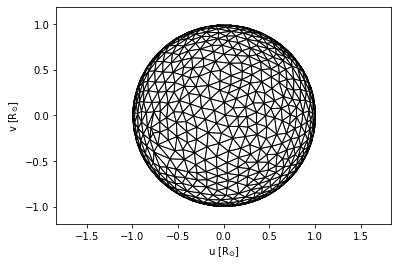

In [35]:
afig, mplfig = b.plot(show=True)

Any of the 1-D fields (ie not vertices or normals) or matplotlib-recognized colornames can be used to color either the faces or edges of the triangles.  Passing none for edgecolor or facecolor turns off the coloring (you may want to set edgecolor=None if setting facecolor to disable the black outline).

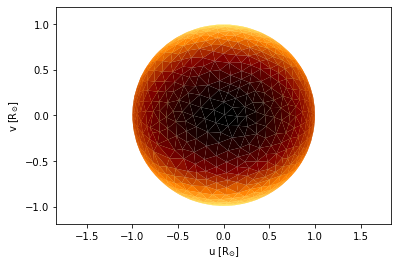

In [36]:
afig, mplfig = b.plot(fc='teffs', ec='None', show=True)

Alternatively, if you provide simple 1-D fields to plot, a 2D x-y plot will be created using the values from each element (always for a single time - if meshes exist for multiple times in the model, you should provide a single time either in the twig or as a filter).

NOTE: providing z=0 will override the default of z-ordering the points by there "w" (line-of-sight distance) value, which can be expensive and take a while to draw.

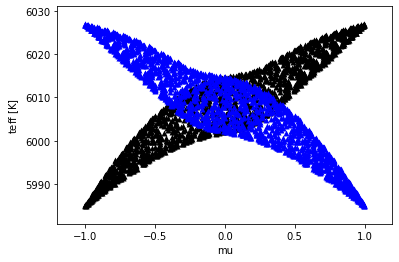

In [37]:
afig, mplfig = b.plot(x='mus', y='teffs', z=0, show=True)

The exception to needing to provide a time is for the per-time parameters mentioned above.  For these, time can be the x-array (not very exciting in this case with only a single time).

For more examples see the following:
- [Passband Luminosity Tutorial](pblum)

/home/kyle/.local/lib/python3.7/site-packages/phoebe/dependencies/autofig/axes.py:1257: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(xlim)
/home/kyle/.local/lib/python3.7/site-packages/phoebe/dependencies/autofig/axes.py:1260: UserWarning: Attempting to set identical bottom == top == 4.188790204786394 results in singular transformations; automatically expanding.
  ax.set_ylim(ylim)


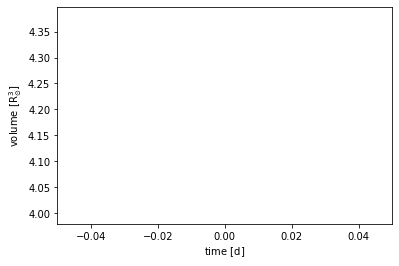

In [38]:
afig, mplfig = b.plot(x='times', y='volume', marker='s', show=True)